---
title: "Deep Learning Book Chapter 7 Prerequisites: Hessian Matrix, Definiteness, and Curvature"
author: "Chao Ma"
date: "2025-10-07"
categories: ["Deep Learning", "Optimization", "Mathematics"]
code-fold: true
code-summary: "Show code"
---

## Context

[My notebook](https://github.com/ickma2311/foundations/blob/main/deep_learning/chapter7/prerequisites/hessian_and_curvature.ipynb)

Before diving into optimization algorithms for deep learning (Chapter 7), we need to understand **second-order derivatives** in multiple dimensions. The Hessian matrix is the key tool that generalizes the concept of curvature to high-dimensional spaces.

---

## Why Second Derivatives Matter

In one dimension, optimizing $f(x)$ involves:

1. **First derivative $f'(x) = 0$** → Find critical points
   - **Why set $f'(x) = 0$?** At a minimum or maximum, the slope is flat (zero)
   - Think of a hill: at the very top, you stop going up → slope = 0
   - At the bottom of a valley, you stop going down → slope = 0
   - **Example:** For $f(x) = x^2$, we have $f'(x) = 2x$. Setting $f'(x) = 0$ gives $x = 0$ (the minimum)

2. **Second derivative $f''(x)$** → Classify the critical point:
   - $f''(x) > 0$ → **Local minimum** (curves upward like a bowl)
   - $f''(x) < 0$ → **Local maximum** (curves downward like a dome)
   - $f''(x) = 0$ → Inconclusive (could be an inflection point)
   - **Why needed?** Not all points where $f'(x) = 0$ are minima! For $f(x) = x^3$, we have $f'(0) = 0$ but it's neither a min nor max.

**The challenge:** How do we extend this to functions of many variables $f(x_1, x_2, \ldots, x_n)$?

**The answer:** The **Hessian matrix** captures all second-order information.

### Visualizing Second Derivatives

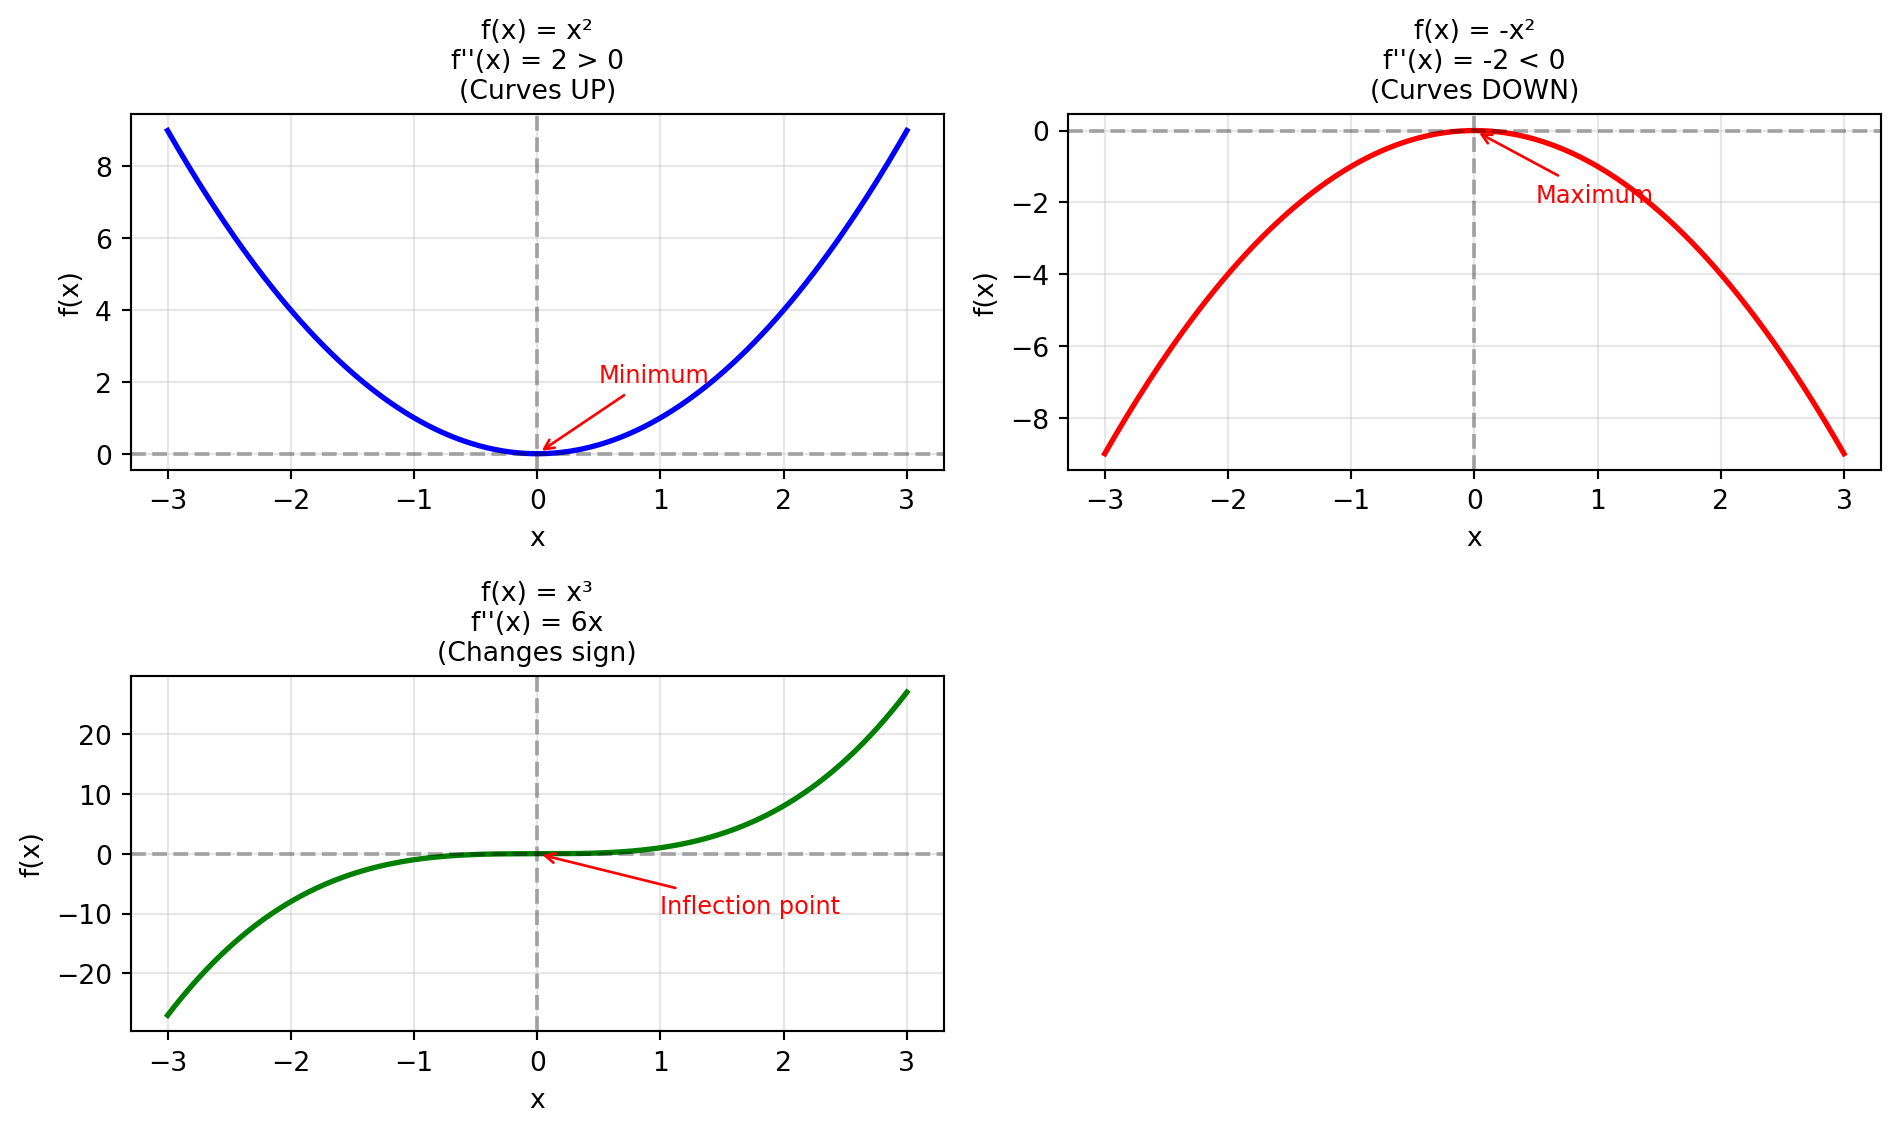

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-3, 3, 200)

# Three functions with different second derivatives
f1 = x**2           # f''(x) = 2 (positive, curves up)
f2 = -x**2          # f''(x) = -2 (negative, curves down)
f3 = x**3           # f''(x) = 6x (changes sign at x=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Function 1: f(x) = x²
axes[0, 0].plot(x, f1, 'b-', linewidth=2)
axes[0, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].set_title("f(x) = x²\nf''(x) = 2 > 0\n(Curves UP)", fontsize=10)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].annotate('Minimum', xy=(0, 0), xytext=(0.5, 2),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=9, color='red')

# Function 2: f(x) = -x²
axes[0, 1].plot(x, f2, 'r-', linewidth=2)
axes[0, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0, 1].set_title("f(x) = -x²\nf''(x) = -2 < 0\n(Curves DOWN)", fontsize=10)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].annotate('Maximum', xy=(0, 0), xytext=(0.5, -2),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=9, color='red')

# Function 3: f(x) = x³
axes[1, 0].plot(x, f3, 'g-', linewidth=2)
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[1, 0].set_title("f(x) = x³\nf''(x) = 6x\n(Changes sign)", fontsize=10)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('f(x)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].annotate('Inflection point', xy=(0, 0), xytext=(1, -10),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=9, color='red')

# Hide the unused subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

**Key observations:**

| Second Derivative | Curvature | Shape | Point Type |
|-------------------|-----------|-------|------------|
| $f''(x) > 0$ | Curves upward | Bowl shape | Potential minimum |
| $f''(x) < 0$ | Curves downward | Dome shape | Potential maximum |
| $f''(x) = 0$ (at critical point) | Changes sign | Flat at that point | Inflection point |

**Note on the third example:** For $f(x) = x^3$, we have $f''(x) = 6x$. At the critical point $x = 0$, $f''(0) = 0$, which is inconclusive. The curvature changes sign: negative for $x < 0$ and positive for $x > 0$.

---

## The Hessian Matrix

### Definition

For a scalar function $f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n)$, the **Hessian matrix** is the square matrix of all second-order partial derivatives:

$$
H(f) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

### Key Properties

1. **Symmetric:** If mixed partial derivatives are continuous, then $\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$, so $H = H^T$.

2. **Shape:** Always $n \times n$ (determined by number of variables, not terms in the function)

3. **Describes curvature** in all directions simultaneously

4. **Eigenvalue decomposition:** Since the Hessian is symmetric, it can be decomposed as $H = Q\Lambda Q^T$ where $Q$ contains orthonormal eigenvectors and $\Lambda$ is a diagonal matrix of eigenvalues

### Simple Example

For $f(x, y) = x^2 + 3y^2$:

**Step 1:** Compute first derivatives
$$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 6y
$$

**Step 2:** Compute second derivatives
$$
\frac{\partial^2 f}{\partial x^2} = 2, \quad \frac{\partial^2 f}{\partial y^2} = 6, \quad \frac{\partial^2 f}{\partial x \partial y} = 0
$$

**Step 3:** Build Hessian
$$
H = \begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix}
$$

**Interpretation:**
- Curvature along $x$-axis: 2
- Curvature along $y$-axis: 6
- No cross-dependency (off-diagonal = 0)

### Example with Cross Terms

For $f(x, y) = x^2 + xy + y^2$:

$$
H = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}
$$

The off-diagonal term (1) indicates that $x$ and $y$ are **coupled**—changing one affects the rate of change of the other.

---

## Matrix Definiteness

For a **symmetric matrix** $A$, its definiteness is determined by the **signs of its eigenvalues**.

| Type | Eigenvalues | Quadratic Form $x^T A x$ | Geometric Shape |
|------|-------------|--------------------------|-----------------|
| **Positive definite (PD)** | all $> 0$ | $> 0$ for all $x \neq 0$ | Bowl (curves upward) |
| **Negative definite (ND)** | all $< 0$ | $< 0$ for all $x \neq 0$ | Dome (curves downward) |
| **Indefinite** | some $+$, some $-$ | depends on direction | Saddle |
| **Positive semi-definite (PSD)** | all $\geq 0$ | $\geq 0$ for all $x$ | Flat-bottom bowl |
| **Negative semi-definite (NSD)** | all $\leq 0$ | $\leq 0$ for all $x$ | Flat-top dome |

### Quick Test (2×2 case)

For $A = \begin{bmatrix} a & b \\ b & c \end{bmatrix}$:

- **Positive definite** if $a > 0$ and $ac - b^2 > 0$
- **Negative definite** if $a < 0$ and $ac - b^2 > 0$
- **Indefinite** if $ac - b^2 < 0$

### Examples

1. $\begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix}$: eigenvalues = [2, 6] → **Positive definite**

2. $\begin{bmatrix} -2 & 0 \\ 0 & -3 \end{bmatrix}$: eigenvalues = [-2, -3] → **Negative definite**

3. $\begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$: eigenvalues = [2, -2] → **Indefinite**

4. $\begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix}$: eigenvalues = [4, 0] → **Positive semi-definite**

---

## Interpreting Hessian at Critical Points

At a **critical point** where $\nabla f = 0$, the Hessian determines the nature of the point:

| Hessian Type | Eigenvalues | Surface Shape | Point Type |
|--------------|-------------|---------------|------------|
| **Positive definite** | all positive | Bowl (convex) | **Local minimum** |
| **Negative definite** | all negative | Dome (concave) | **Local maximum** |
| **Indefinite** | mixed signs | Saddle | **Neither** min nor max |
| **Semi-definite** | some zero | Flat in some directions | **Inconclusive** |

### Visualization: Different Surface Types

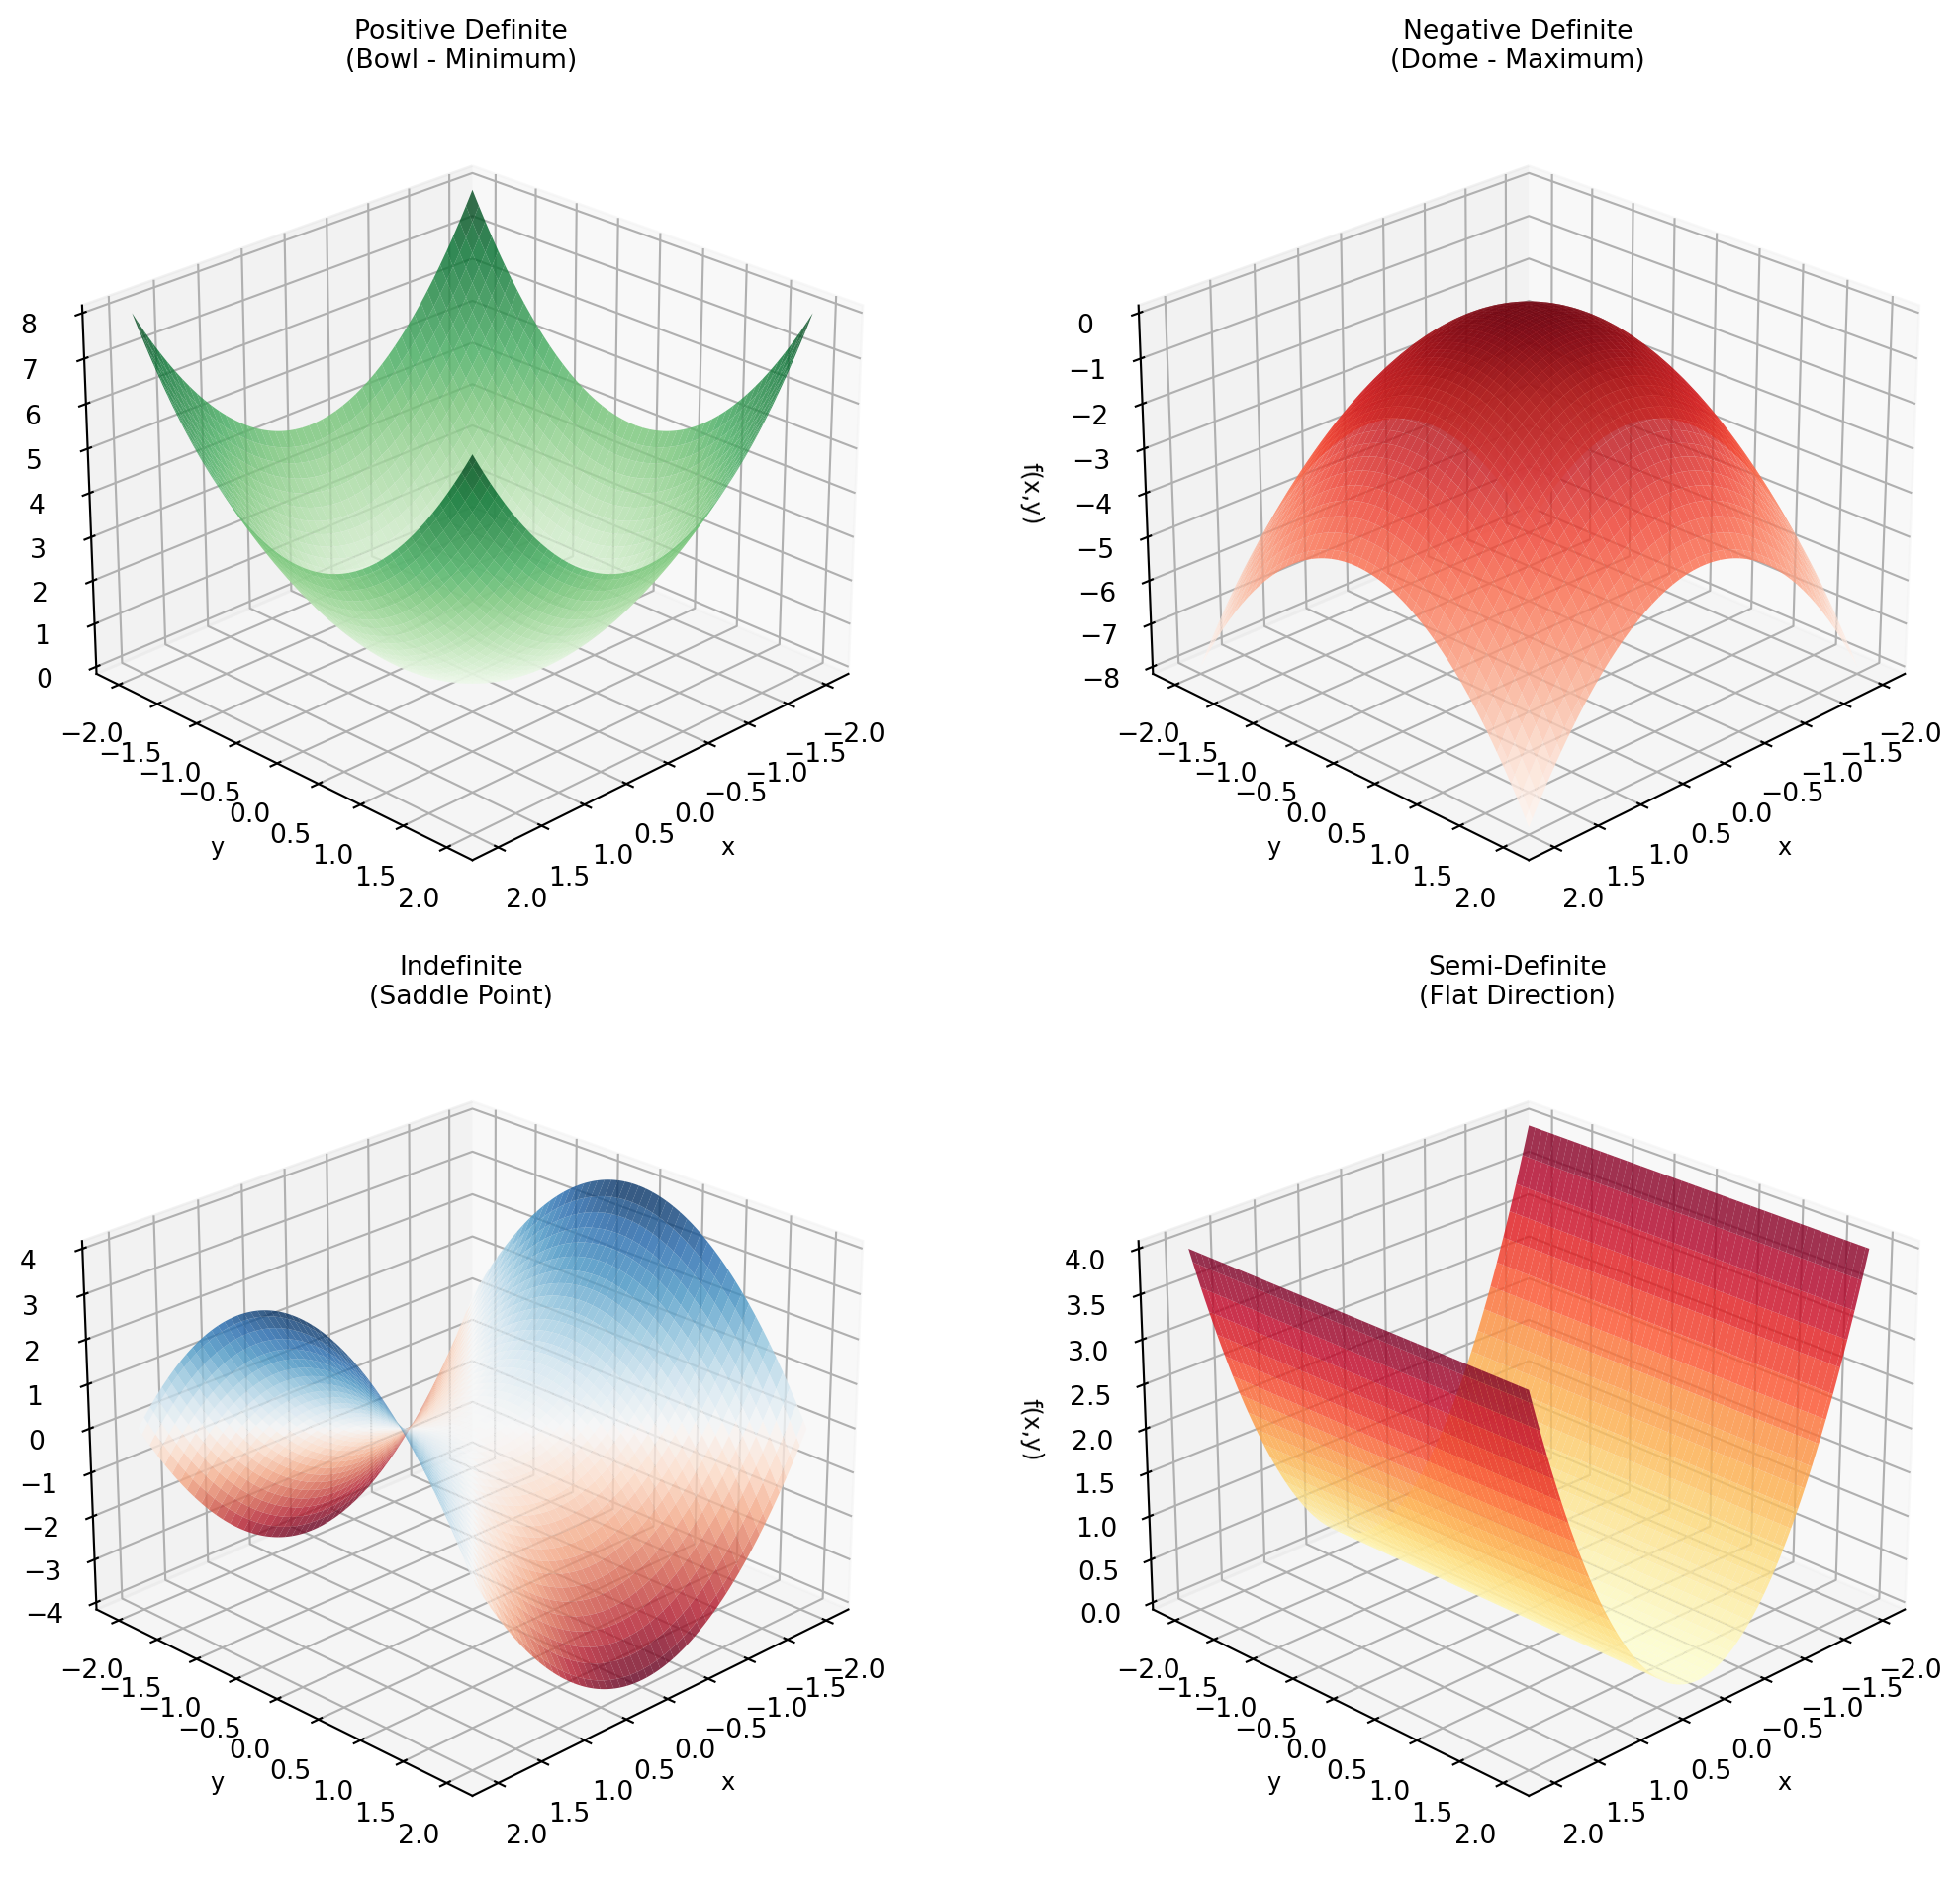

In [2]:
# Create grid for plotting
x_grid = np.linspace(-2, 2, 100)
y_grid = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Define different functions with different Hessian types
def positive_definite(x, y):
    """Minimum: f = x² + y²"""
    return x**2 + y**2

def negative_definite(x, y):
    """Maximum: f = -x² - y²"""
    return -x**2 - y**2

def indefinite(x, y):
    """Saddle: f = x² - y²"""
    return x**2 - y**2

def semi_definite(x, y):
    """Flat direction: f = x²"""
    return x**2

# Create 3D surface plots in 2x2 grid
fig = plt.figure(figsize=(12, 10))

functions = [
    (positive_definite, "Positive Definite\n(Bowl - Minimum)", "Greens"),
    (negative_definite, "Negative Definite\n(Dome - Maximum)", "Reds"),
    (indefinite, "Indefinite\n(Saddle Point)", "RdBu"),
    (semi_definite, "Semi-Definite\n(Flat Direction)", "YlOrRd")
]

for idx, (func, title, cmap) in enumerate(functions, 1):
    ax = fig.add_subplot(2, 2, idx, projection='3d')
    Z = func(X, Y)

    surf = ax.plot_surface(X, Y, Z, cmap=cmap, alpha=0.8,
                           linewidth=0, antialiased=True)

    ax.set_xlabel('x', fontsize=9)
    ax.set_ylabel('y', fontsize=9)
    ax.set_zlabel('f(x,y)', fontsize=9)
    ax.set_title(title, fontsize=10)
    ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

**Contour plots for better understanding:**

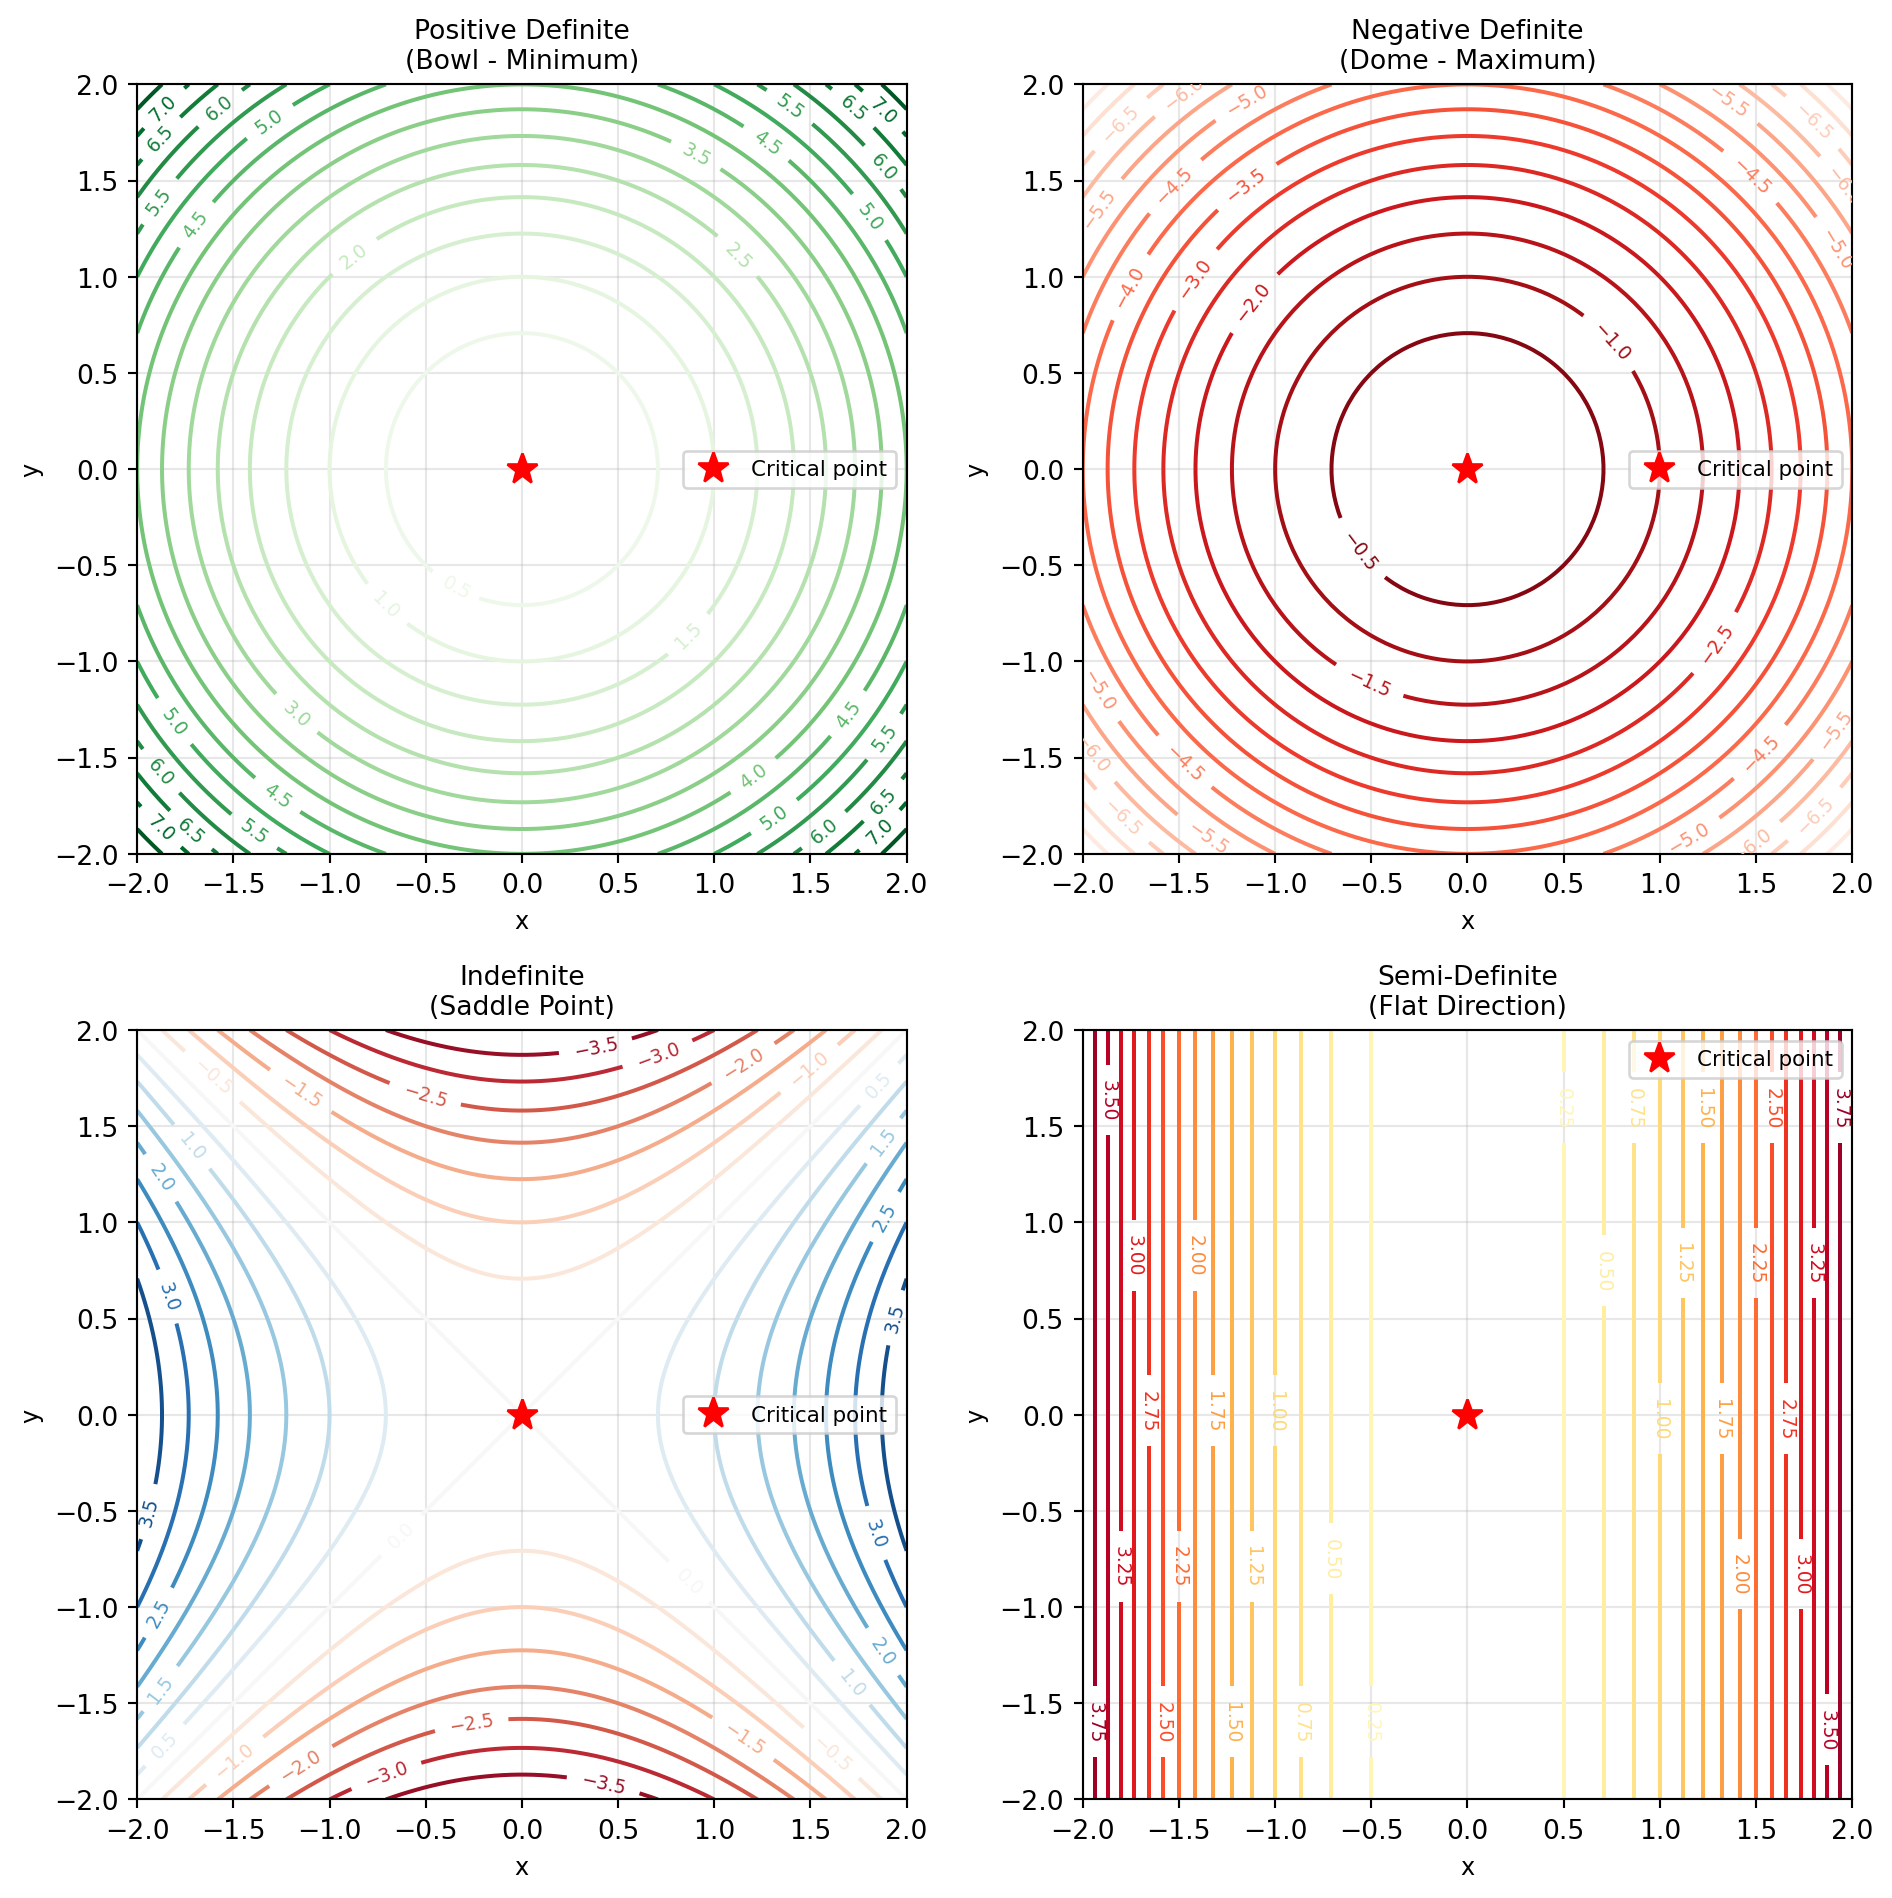

In [3]:
# Contour plots in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for idx, (func, title, cmap) in enumerate(functions):
    ax = axes[idx]
    Z = func(X, Y)

    contour = ax.contour(X, Y, Z, levels=15, cmap=cmap)
    ax.clabel(contour, inline=True, fontsize=7)

    # Mark the critical point at origin
    ax.plot(0, 0, 'r*', markersize=12, label='Critical point')

    ax.set_xlabel('x', fontsize=9)
    ax.set_ylabel('y', fontsize=9)
    ax.set_title(title, fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()